In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import keras
from keras.datasets import cifar10
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, image
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Activation, Conv2D, MaxPooling2D
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model, Sequential
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


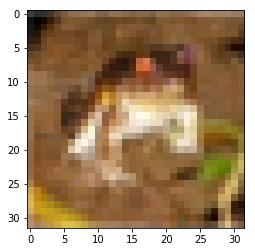

In [6]:
for i in range(0,1):
    first_array=x_train[i]
    #Not sure you even have to do that if you just want to visualize it
    #first_array=255*first_array
    #first_array=first_array.astype("uint8")
    plt.imshow(first_array)
    #Actually displaying the plot if you are not in interactive mode
    plt.show()
    #Saving plot
    #plt.savefig("fig.png")

In [7]:
batch_size = 64
num_classes = 10
epochs = 100

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
%%time
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=x_train.shape[1:]))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          shuffle=True)

score = model.evaluate(x_test, y_test, verbose=0)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 333us/step - loss: 2.2502 - acc: 0.1455 - val_loss: 2.1896 - val_acc: 0.1930
Epoch 2/100
50000/50000 [==============================] - 15s 292us/step - loss: 2.1701 - acc: 0.2030 - val_loss: 2.1337 - val_acc: 0.2529
Epoch 3/100
50000/50000 [==============================] - 14s 276us/step - loss: 2.1225 - acc: 0.2720 - val_loss: 2.0880 - val_acc: 0.3162
Epoch 4/100
50000/50000 [==============================] - 15s 302us/step - loss: 2.0761 - acc: 0.3278 - val_loss: 2.0403 - val_acc: 0.3693
Epoch 5/100
50000/50000 [==============================] - 12s 250us/step - loss: 2.0294 - acc: 0.3579 - val_loss: 1.9941 - val_acc: 0.3734
Epoch 6/100
50000/50000 [==============================] - 12s 243us/step - loss: 1.9810 - acc: 0.3786 - val_loss: 1.9502 - val_acc: 0.3902
Epoch 7/100
50000/50000 [==============================] - 12s 242us/step - loss: 1.9341 - acc: 0.3883 - val_l

Epoch 59/100
50000/50000 [==============================] - 12s 240us/step - loss: 0.9042 - acc: 0.6584 - val_loss: 0.9393 - val_acc: 0.6488
Epoch 60/100
50000/50000 [==============================] - 12s 239us/step - loss: 0.8908 - acc: 0.6621 - val_loss: 0.9397 - val_acc: 0.6524
Epoch 61/100
50000/50000 [==============================] - 12s 240us/step - loss: 0.8856 - acc: 0.6637 - val_loss: 0.9405 - val_acc: 0.6598
Epoch 62/100
50000/50000 [==============================] - 12s 247us/step - loss: 0.8798 - acc: 0.6678 - val_loss: 0.9347 - val_acc: 0.6640
Epoch 63/100
50000/50000 [==============================] - 12s 250us/step - loss: 0.8741 - acc: 0.6705 - val_loss: 0.9169 - val_acc: 0.6536
Epoch 64/100
50000/50000 [==============================] - 12s 249us/step - loss: 0.8731 - acc: 0.6710 - val_loss: 0.9086 - val_acc: 0.6625
Epoch 65/100
50000/50000 [==============================] - 12s 244us/step - loss: 0.8641 - acc: 0.6750 - val_loss: 0.9113 - val_acc: 0.6669
Epoch 66/100


In [10]:
model_path = 'model.h5'
model.save(model_path)